## Predict if a customer if going to make term deposit or not

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
#from sklearn.feature_selection import SelectkBest,chi2
import pickle
%matplotlib.online

UsageError: Line magic function `%matplotlib.online` not found.


Data Description

 
The dataset we are using has total 16 columns and 11162 rows.

The columns of the dataset are:-

1 - age: (numeric)


2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')


3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)


4 - education: (categorical: primary, secondary, tertiary and unknown)


5 - default: has credit in default? (categorical: 'no','yes','unknown')


6 - housing: has housing loan? (categorical: 'no','yes','unknown')


7 - loan: has personal loan? (categorical: 'no','yes','unknown')


8 - contact: contact communication type (categorical: 'cellular','telephone')


9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')


10 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')


11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no')


12 - balance: Balance of the individual.

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)


15 - previous: number of contacts performed before this campaign and for this client (numeric)


16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


17 - Output variable (desired target):
 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [3]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,chi2

import pickle
%matplotlib inline

In [5]:
ds = pd.read_csv("../data/external/bank.csv") #reading the csv file

In [6]:
ds.head() #checking the top 5 records

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
ds.info() # getting more idea aboout data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
ds.describe() # checking some statistical information for our data

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [9]:
duplicate = ds[ds.duplicated(subset=None,keep='first')] 
  
print("Duplicate Rows :") 
  
# Print the resultant Dataframe 
duplicate.shape 
#duplicate

Duplicate Rows :


(0, 17)

In [10]:
# creating a list which only contains categorical data

cat = [i for i in ds.columns if ds[i].dtype=='O'] 

In [11]:
# method for printing the sub-categoires present

def get_cat(cat):
    for i in cat:
        a = ds[i].unique()
        print('unique values in'+' '+i+' '+'are:-',a)

In [12]:
get_cat(cat) # calling the method

unique values in job are:- ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
unique values in marital are:- ['married' 'single' 'divorced']
unique values in education are:- ['secondary' 'tertiary' 'primary' 'unknown']
unique values in default are:- ['no' 'yes']
unique values in housing are:- ['yes' 'no']
unique values in loan are:- ['no' 'yes']
unique values in contact are:- ['unknown' 'cellular' 'telephone']
unique values in month are:- ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
unique values in poutcome are:- ['unknown' 'other' 'failure' 'success']
unique values in deposit are:- ['yes' 'no']


## Now lets check how many null values are present on our data

In [13]:
ds.isnull().sum() # checking the total number of nan values


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [14]:
ds.head() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Data Visualization

## Univariate Analysis

In [15]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

In [16]:
fig = px.pie(ds, names='deposit',width=600, height=400 )
fig.show()

The above plot says that the proportion of the deposits which is 'Yes' is almost equal to class 'No', so the classes are balanced.

In [17]:
fig = px.histogram(ds, x="age",width=800, height=400)
fig.show()

From the above plot we can see that the age column is rightly skewed which means there is maximium amout of data present between the age 20-60 and above that the density decreases.

In [18]:
#sns.histplot(ds['balance'], kde = True)
fig = px.histogram(ds, x="balance",width=800, height=400, nbins = 80)
fig.show()

Same case is for the column 'balance' where is rightly skewed and along with some outliers.

In [19]:
fig = px.histogram(ds, x="duration",width=800, height=400, nbins = 80)
fig.show()

The above distribution also has some outliers as most of the data lies between the range 0 to around 500 but there are extreme outliers present at 4000.

## Bi variate Analysis: Numerical Variables

In [20]:
# ploting scatter plot
fig = px.scatter(ds, x="age",y = 'balance', width=800, height=400)
fig.show()
#sns.scatterplot(data=ds, x="age", y="balance")

The above scatter plot says that there is no significant relation between age and balance as many people between the age 20 and 90 have almost the same balance that is less than 20,000 onyly few of them are having the balance more than or equal to 20,000.

In [21]:
#sns.scatterplot(data=ds, x="age", y="duration") 
fig = px.scatter(ds, x="age",y = 'duration', width=800, height=400)
fig.show()

We can observe from the above distribuiton is that people who are aged between 20-60 have received calls whos duration was less than or equal to 2 minutes. Ony some of them have calls whos duration more than 2 minutes.

In [22]:
fig = px.scatter_3d(ds, x='age', y='balance', z='duration',color = 'deposit')
fig.show()

### visualization of  the categorical variables

In [23]:
ds.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Categorical Variable: uni-variate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'admin.'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'services'),
  Text(3, 0, 'management'),
  Text(4, 0, 'retired'),
  Text(5, 0, 'blue-collar'),
  Text(6, 0, 'unemployed'),
  Text(7, 0, 'entrepreneur'),
  Text(8, 0, 'housemaid'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'self-employed'),
  Text(11, 0, 'student')])

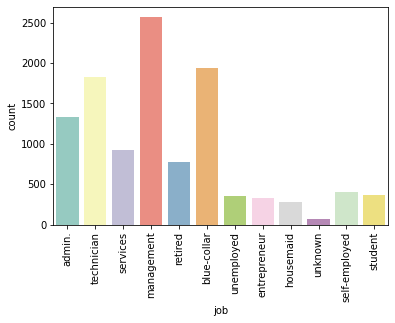

In [24]:
sns.countplot(x="job", data=ds, palette="Set3")
plt.xticks(rotation=90)

<Figure size 3600x3600 with 0 Axes>

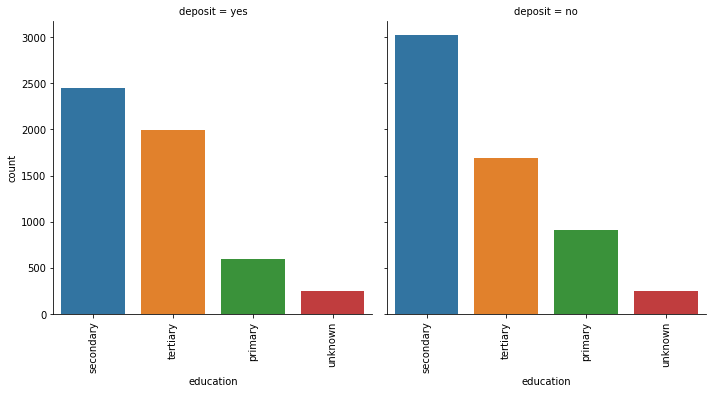

In [25]:
plt.figure(figsize=(50,50))
a = sns.catplot(x="education", col="deposit",
                data=ds, kind="count")
#plt.xticks(rotation=90)
a.set_xticklabels(rotation=90)

<Figure size 3600x3600 with 0 Axes>

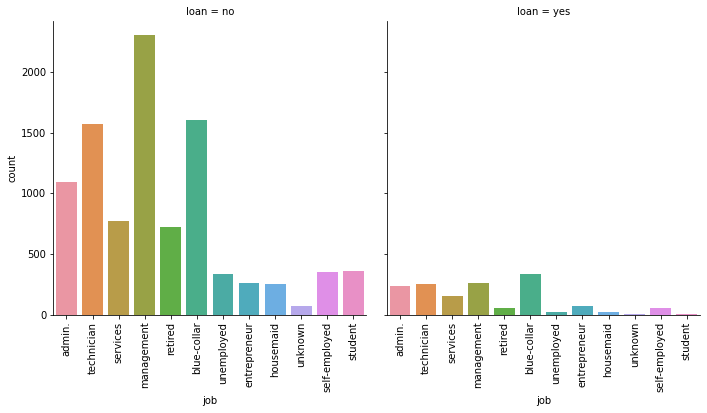

In [26]:
plt.figure(figsize=(50,50))
a = sns.catplot(x="job", col="loan",
                data=ds, kind="count")
#plt.xticks(rotation=90)
a.set_xticklabels(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'may'),
  Text(1, 0, 'jun'),
  Text(2, 0, 'jul'),
  Text(3, 0, 'aug'),
  Text(4, 0, 'oct'),
  Text(5, 0, 'nov'),
  Text(6, 0, 'dec'),
  Text(7, 0, 'jan'),
  Text(8, 0, 'feb'),
  Text(9, 0, 'mar'),
  Text(10, 0, 'apr'),
  Text(11, 0, 'sep')])

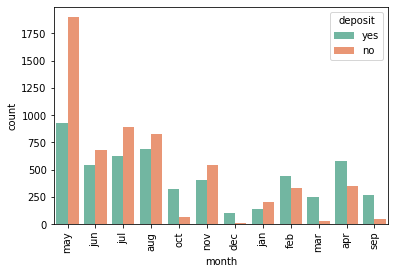

In [27]:
sns.countplot(x="month", hue="deposit", data=ds, palette="Set2")
plt.xticks(rotation=90)

<Figure size 3600x3600 with 0 Axes>

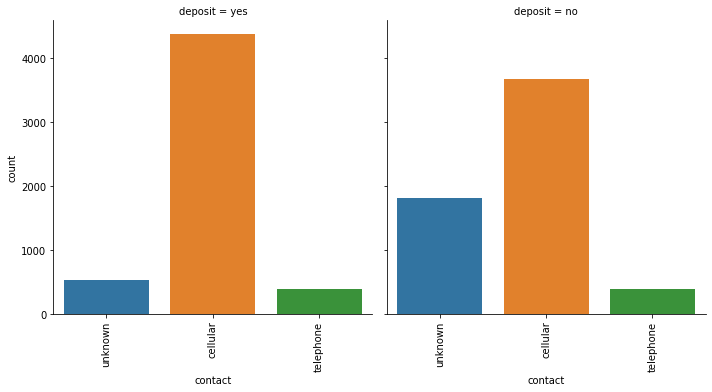

In [28]:
plt.figure(figsize=(50,50))
a = sns.catplot(x="contact", col="deposit",
                data=ds, kind="count")
#plt.xticks(rotation=90)
a.set_xticklabels(rotation=90)

(array([0, 1, 2, 3]),
 [Text(0, 0, 'unknown'),
  Text(1, 0, 'other'),
  Text(2, 0, 'failure'),
  Text(3, 0, 'success')])

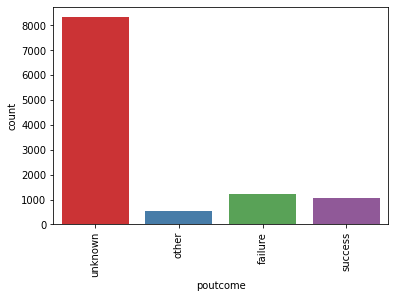

In [29]:
sns.countplot(x="poutcome", data=ds, palette="Set1")
plt.xticks(rotation=90)

### Box plot

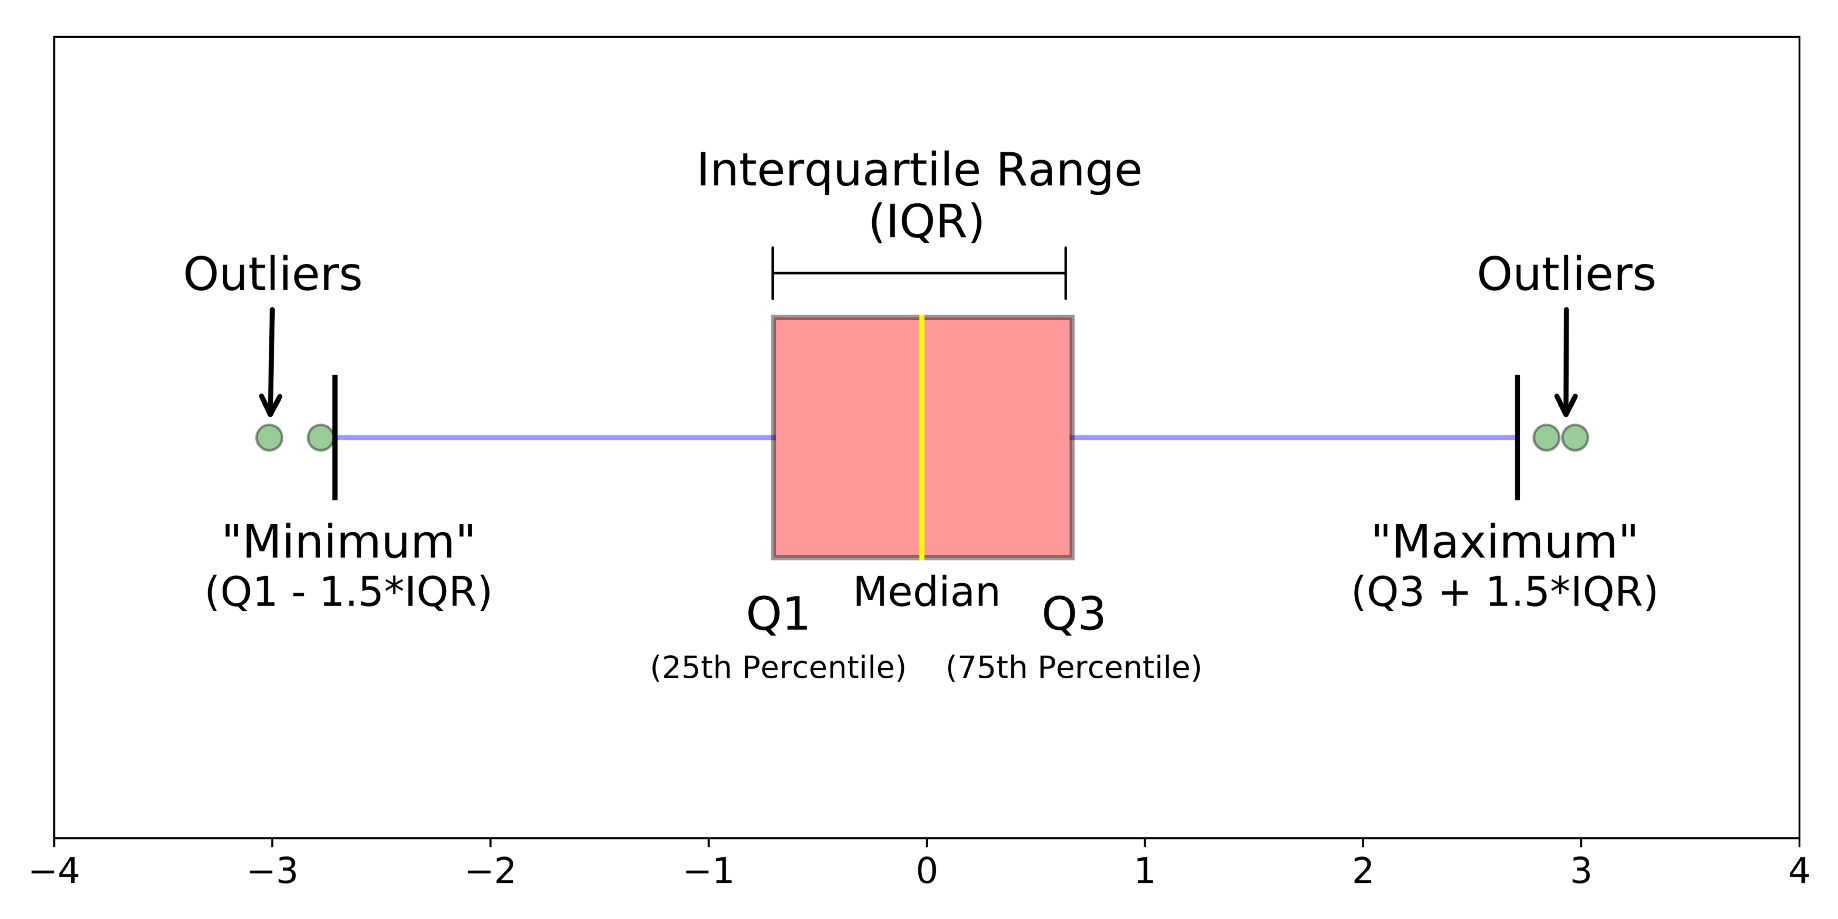

In [30]:
ds.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


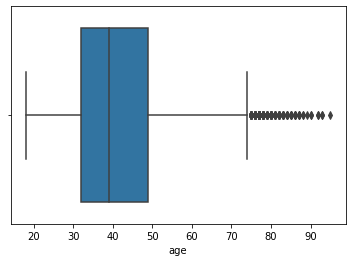

In [31]:
fig = sns.boxplot(x=ds.age)

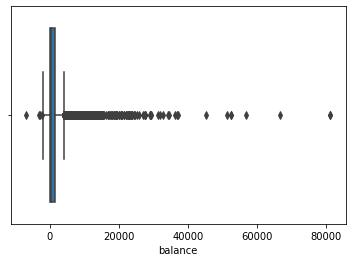

In [32]:
fig = sns.boxplot(x=ds.balance)

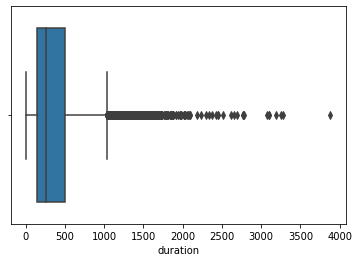

In [33]:
fig = sns.boxplot(x=ds.duration)

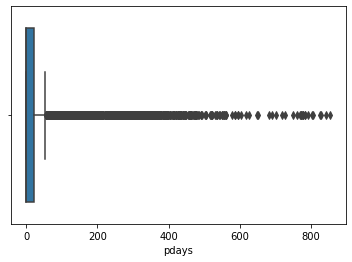

In [34]:
fig = sns.boxplot(x=ds.pdays)

### Correlation

Lastly we will also use corelation matrix to check which columns are co-relatred to each other.

before that what is corelations?..It is the association between the columns which say how much they are depended or change or move in relation to another varibale/column.

It gives us the idea about the degree of the relationship of the two variables.

Types of Corelation:

A correlation could be positive, meaning both variables move in the same direction, or negative, meaning that when one variable’s value increases, the other variables’ values decrease. Correlation can also be neutral or zero, meaning that the variables are unrelated.

Positive Correlation: both variables change in the same direction.

Neutral Correlation: No relationship in the change of the variables.

Negative Correlation: variables change in opposite directions.

<AxesSubplot:>

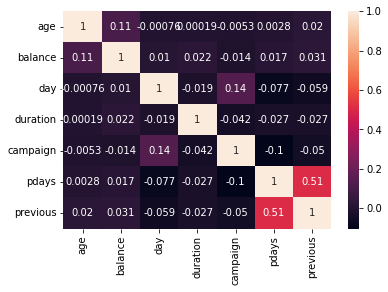

In [35]:
sns.heatmap(ds.corr(),annot = True) # heatmap for corelation


The above corelation matrix says that there is no signigicant relation between the columns. You can see the color map at the right side where the corelation value is high the color gets darker.

Steps to remove outliers using IQR

1) Sort the data in ascending order

2) find the first quantile(Q1) and the third quantile(Q3) values

3) Find it's IQR by substracting (Q1-Q2)

4) Set the lower bound i.e Q1*1.5

5) Set the upper bound i.e Q3*1.5

In [36]:
ds1 = ds.copy() # making a copy of the orignal data

In [37]:
ds1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [38]:
# method for removing outliers

def remove_outliers(lis):
    for i in lis:
        q1, q3 = np.percentile(ds[i],[25,75])
        iqr = q3-q1
        lowb = q1-(1.5*iqr)
        upb = q3+(1.5*iqr)
        print('upper bound for'+ ' '+i, upb)
        print('lower bound for'+' '+i, lowb)
        ds1.loc[ds1[i]>=upb,i] = upb
        ds1.loc[ds1[i]<=lowb,i] = lowb
    print('Removed!')


In [39]:
nums = [i for i in ds1.columns if ds1[i].dtype != 'O']
nums.remove('day')
nums.remove('campaign')
nums.remove('previous')
print(nums)
remove_outliers(nums)

['age', 'balance', 'duration', 'pdays']
upper bound for age 74.5
lower bound for age 6.5
upper bound for balance 4087.0
lower bound for balance -2257.0
upper bound for duration 1033.0
lower bound for duration -399.0
upper bound for pdays 53.375
lower bound for pdays -33.625
Removed!


<AxesSubplot:xlabel='pdays'>

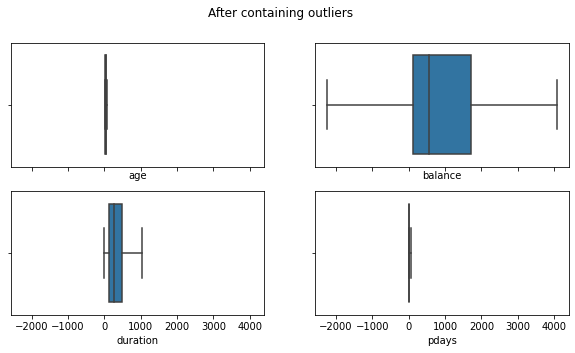

In [40]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(10,5))

fig.suptitle('After containing outliers')


sns.boxplot(ax=axes[0,0], x = ds1['age'])


sns.boxplot(ax=axes[0,1], x = ds1['balance'])


sns.boxplot(ax=axes[1,0], x = ds1['duration'])

sns.boxplot(ax=axes[1,1], x = ds1['pdays'])




## Encoding

What is encoding?....Encoding is process of converting the categorical data into numerical representations. There are multiple encoding techniques that are available out of which we will be using target-guided-encoding for ordial features and we can use label encoding for the nomial features.

In [41]:
nominal = ['default', 'housing', 'loan', 'deposit']

In [42]:
le = LabelEncoder() # creating the object

def label_encode(lit):
    for i in lit:
        ds1[i] = le.fit_transform(ds1[i])   #  applying the encoder

In [43]:
label_encode(nominal)

In [44]:
ds1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,0,2343,1,0,unknown,5,may,1033,1,-1.0,0,unknown,1
1,56.0,admin.,married,secondary,0,45,0,0,unknown,5,may,1033,1,-1.0,0,unknown,1
2,41.0,technician,married,secondary,0,1270,1,0,unknown,5,may,1033,1,-1.0,0,unknown,1
3,55.0,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1.0,0,unknown,1
4,54.0,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1.0,0,unknown,1


It's time to encode the categorical feautres using target guided encoding.

What is target-guided encdoing?....Its a type of an encdoing where encoding is done based on the target column in our case its 'income'. So whichever sub-categories contribute more to the target based on that the values will be assigned. If contribution is more than higher value will be assigned.

In [45]:

# method for performing target encoding

def ordi():
    k = ['job','marital','education','contact','month','poutcome']
    for l in k:
        ov = ds1.groupby([l])['deposit'].mean().sort_values().index
        work_ol = {n:p for p,n in enumerate(ov,1)}
        ds1['ordinal_'+l] = ds1[l].map(work_ol)

In [46]:
ordi() # calling the method

In [47]:
ds1.head() # checking the results

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,deposit,ordinal_job,ordinal_marital,ordinal_education,ordinal_contact,ordinal_month,ordinal_poutcome
0,59.0,admin.,married,secondary,0,2343,1,0,unknown,5,...,-1.0,0,unknown,1,7,1,2,1,1,1
1,56.0,admin.,married,secondary,0,45,0,0,unknown,5,...,-1.0,0,unknown,1,7,1,2,1,1,1
2,41.0,technician,married,secondary,0,1270,1,0,unknown,5,...,-1.0,0,unknown,1,5,1,2,1,1,1
3,55.0,services,married,secondary,0,2476,1,0,unknown,5,...,-1.0,0,unknown,1,4,1,2,1,1,1
4,54.0,admin.,married,tertiary,0,184,0,0,unknown,5,...,-1.0,0,unknown,1,7,1,4,1,1,1


In [48]:
# dropping the duplicate columns

ds1.drop(['job','marital','education','contact','month','poutcome'],axis = 1, inplace = True)

In [49]:
ds1.head() # checking the results

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,deposit,ordinal_job,ordinal_marital,ordinal_education,ordinal_contact,ordinal_month,ordinal_poutcome
0,59.0,0,2343,1,0,5,1033,1,-1.0,0,1,7,1,2,1,1,1
1,56.0,0,45,0,0,5,1033,1,-1.0,0,1,7,1,2,1,1,1
2,41.0,0,1270,1,0,5,1033,1,-1.0,0,1,5,1,2,1,1,1
3,55.0,0,2476,1,0,5,579,1,-1.0,0,1,4,1,2,1,1,1
4,54.0,0,184,0,0,5,673,2,-1.0,0,1,7,1,4,1,1,1


In [50]:
# method to convert seconds to minutes
mint =  []
def sec2min():
    for j in ds1['duration']:
        sec_value = j % (24 * 3600)
        sec_value %= 3600
        min_value = sec_value // 60
        sec_value %= 60
        #print(min_value)
        mint.append(int(min_value))

In [51]:
sec2min()
ds1['duration(in minutes)'] = mint # adding the new column to the dataframe

In [52]:
ds1.drop(['duration'],axis = 1, inplace = True) # dropping the duration column

In [53]:
ds1.head() # checking the results

,age,default,balance,housing,loan,day,campaign,pdays,previous,deposit,ordinal_job,ordinal_marital,ordinal_education,ordinal_contact,ordinal_month,ordinal_poutcome,duration(in minutes)
0,59.0,0,2343,1,0,5,1,-1.0,0,1,7,1,2,1,1,1,17
1,56.0,0,45,0,0,5,1,-1.0,0,1,7,1,2,1,1,1,17
2,41.0,0,1270,1,0,5,1,-1.0,0,1,5,1,2,1,1,1,17
3,55.0,0,2476,1,0,5,1,-1.0,0,1,4,1,2,1,1,1,9
4,54.0,0,184,0,0,5,2,-1.0,0,1,7,1,4,1,1,1,11


In [54]:
sc = StandardScaler()
ds1['balance'] = sc.fit_transform(ds1[['balance']]) #  applying standard scaler

In [55]:
ds1.head() # checking the results

,age,default,balance,housing,loan,day,campaign,pdays,previous,deposit,ordinal_job,ordinal_marital,ordinal_education,ordinal_contact,ordinal_month,ordinal_poutcome,duration(in minutes)
0,59.0,0,0.908149,1,0,5,1,-1.0,0,1,7,1,2,1,1,1,17
1,56.0,0,-0.794565,0,0,5,1,-1.0,0,1,7,1,2,1,1,1,17
2,41.0,0,0.113105,1,0,5,1,-1.0,0,1,5,1,2,1,1,1,17
3,55.0,0,1.006696,1,0,5,1,-1.0,0,1,4,1,2,1,1,1,9
4,54.0,0,-0.691572,0,0,5,2,-1.0,0,1,7,1,4,1,1,1,11


In [56]:
max(ds1['balance'])

2.2003738805772444

In [57]:
ds1.to_csv('../data/external/BankAnalysis.csv')